In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data/kc_house_data_cleaned.csv') #don't add data/ because I created the 
#file inside the data folder 
df

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,Average,3,1955,0.0,98178
1,1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,Average,3,1951,1991.0,98125
2,2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,Average,2,1933,NaN,98028
3,3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,Very Good,3,1965,0.0,98136
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,Average,4,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,Average,4,2009,0.0,98103
21593,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,Average,4,2014,0.0,98146
21594,21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,Average,3,2009,0.0,98144
21595,21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,Average,4,2004,0.0,98027


In [71]:
dict_replace = {'Poor': 0,'Fair': 1,
                'Good': 2, 'Average': 3,
                'Very Good':4}
df.condition = df.condition.apply(lambda x: dict_replace[x])
df.view.value_counts()

0    19485
1      957
3      508
2      330
4      317
Name: view, dtype: int64

In [72]:
df.bedrooms.describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [73]:
df.loc[df['bedrooms']==33]

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode


In [74]:
df.iat[15856,3] = 3

In [75]:
df.loc[df['id']==2402100895]

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
15856,15856,2402100895,640000.0,3,1.75,1620,6000,1.0,0,0,4,3,1947,0.0,98103


In [76]:
df.condition.value_counts()

#low grade houses are 1 and 2 

3    14020
2     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

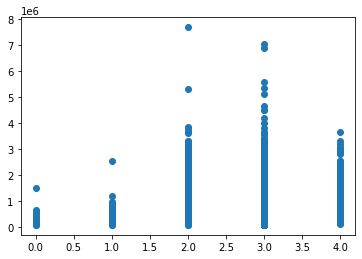

In [78]:
plt.scatter(x=df.condition, y=df.price)
plt.show()

#make a chart on low grades vs low price 

In [79]:
grouped = df.groupby('condition')['price'].mean()    
#I'm grouping by grade (), but accessing price 
#column []
grouped

condition
0    341067.241379
1    328178.758824
2    521374.450414
3    542173.057347
4    612577.742504
Name: price, dtype: float64

In [80]:
grouped.index  #x values

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='condition')

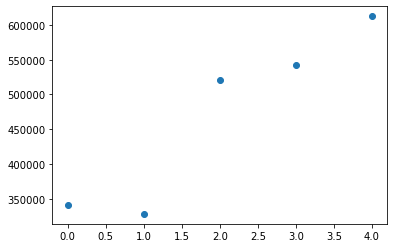

In [81]:
plt.scatter(grouped.index,grouped) 

[Text(0.5, 1.0, 'Bedrooms vs Price')]

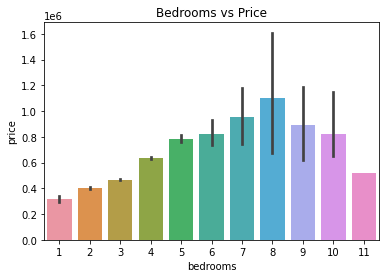

In [86]:
import seaborn as sns
sns.barplot(data=df, x='bedrooms', y='price').set(title='Bedrooms vs Price')   #did seaborn automatically do the avg of bedrooms???

[Text(0.5, 1.0, 'Bathrooms vs Price')]

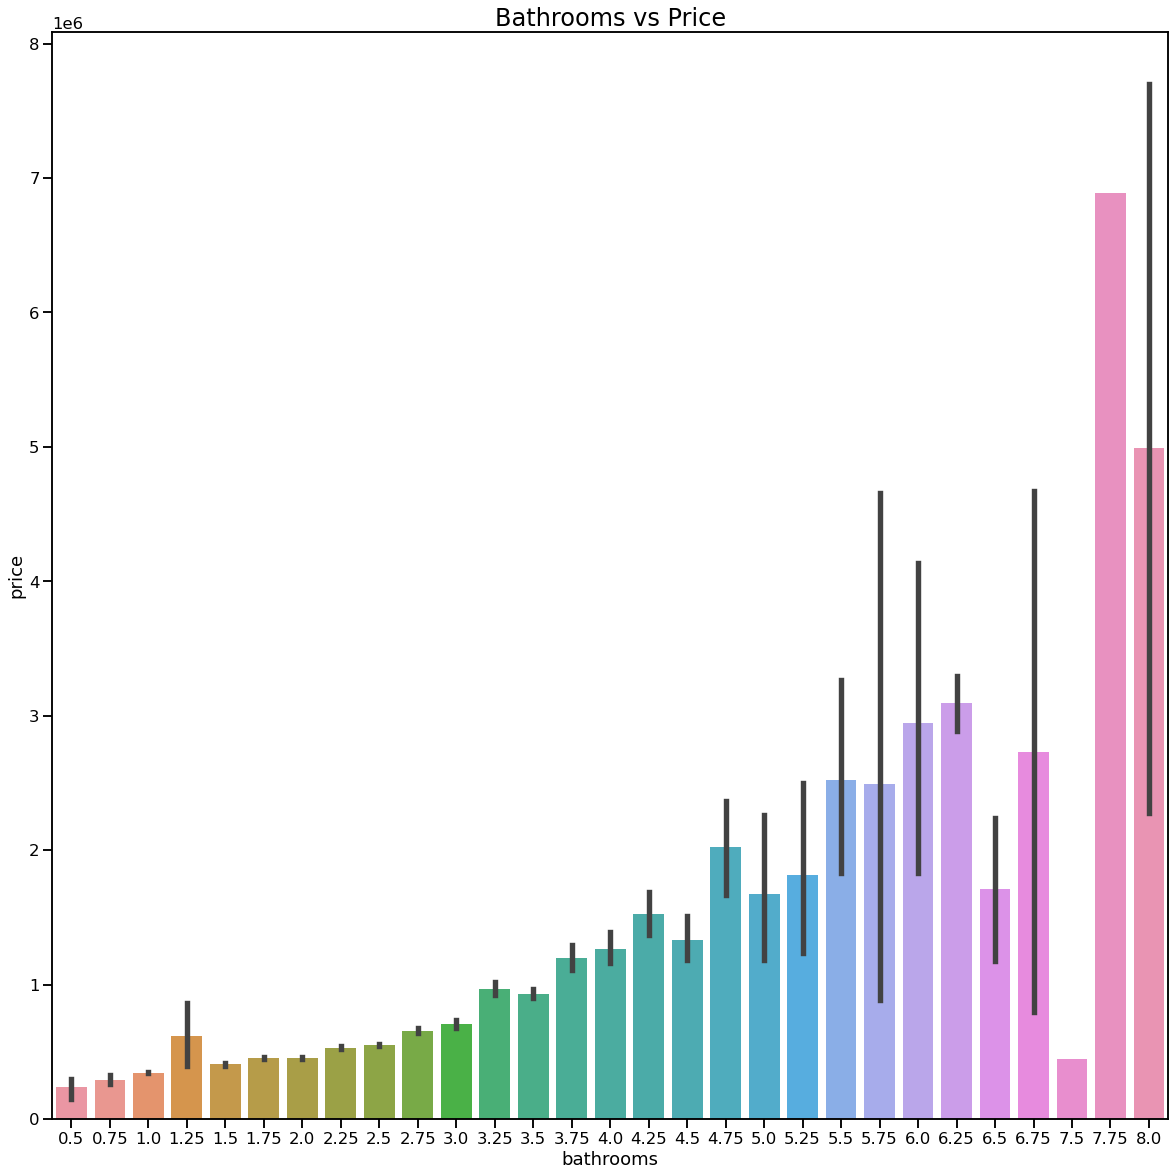

In [104]:

fig, ax = plt.subplots(figsize=(20, 20))  

sns.set_context('poster')    #makes numbers bigger and 'talk' does too
sns.barplot(data=df, x='bathrooms', y='price', ax=ax).set(title='Bathrooms vs Price') 

[Text(0.5, 1.0, 'Sq Ft vs Price')]

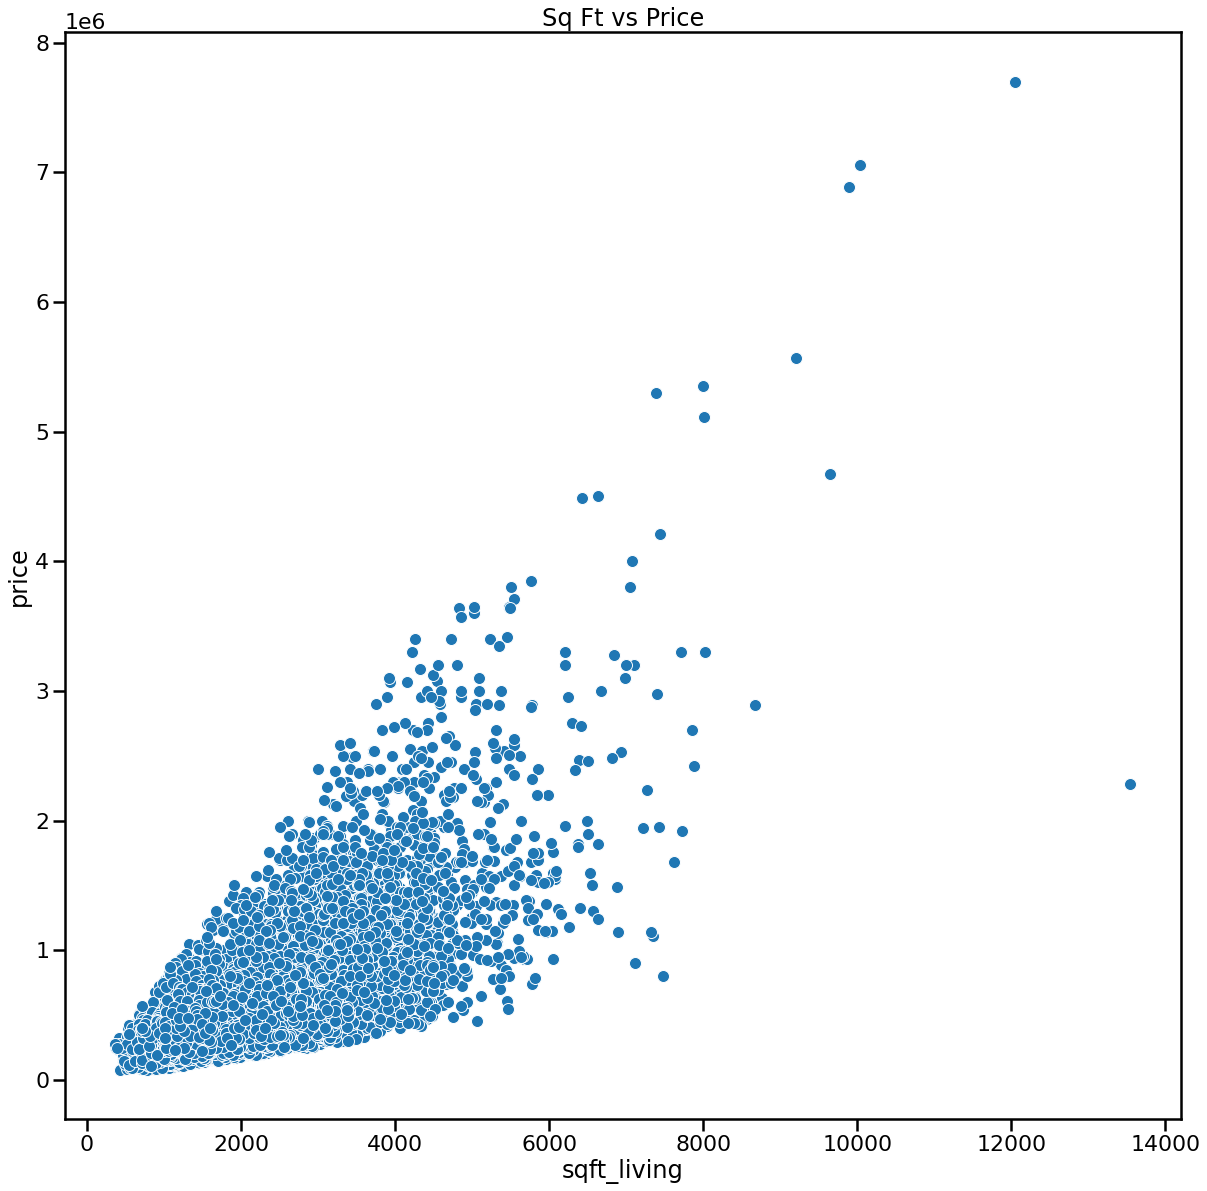

In [107]:
fig, ax = plt.subplots(figsize=(20, 20))  

sns.set_context('poster')    #makes numbers bigger and 'talk' does too
sns.scatterplot(data=df, x='sqft_living', y='price', ax=ax).set(title='Sq Ft vs Price') 